# A simple map

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_int\lib\site-packages\xarray\backends\cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_int\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


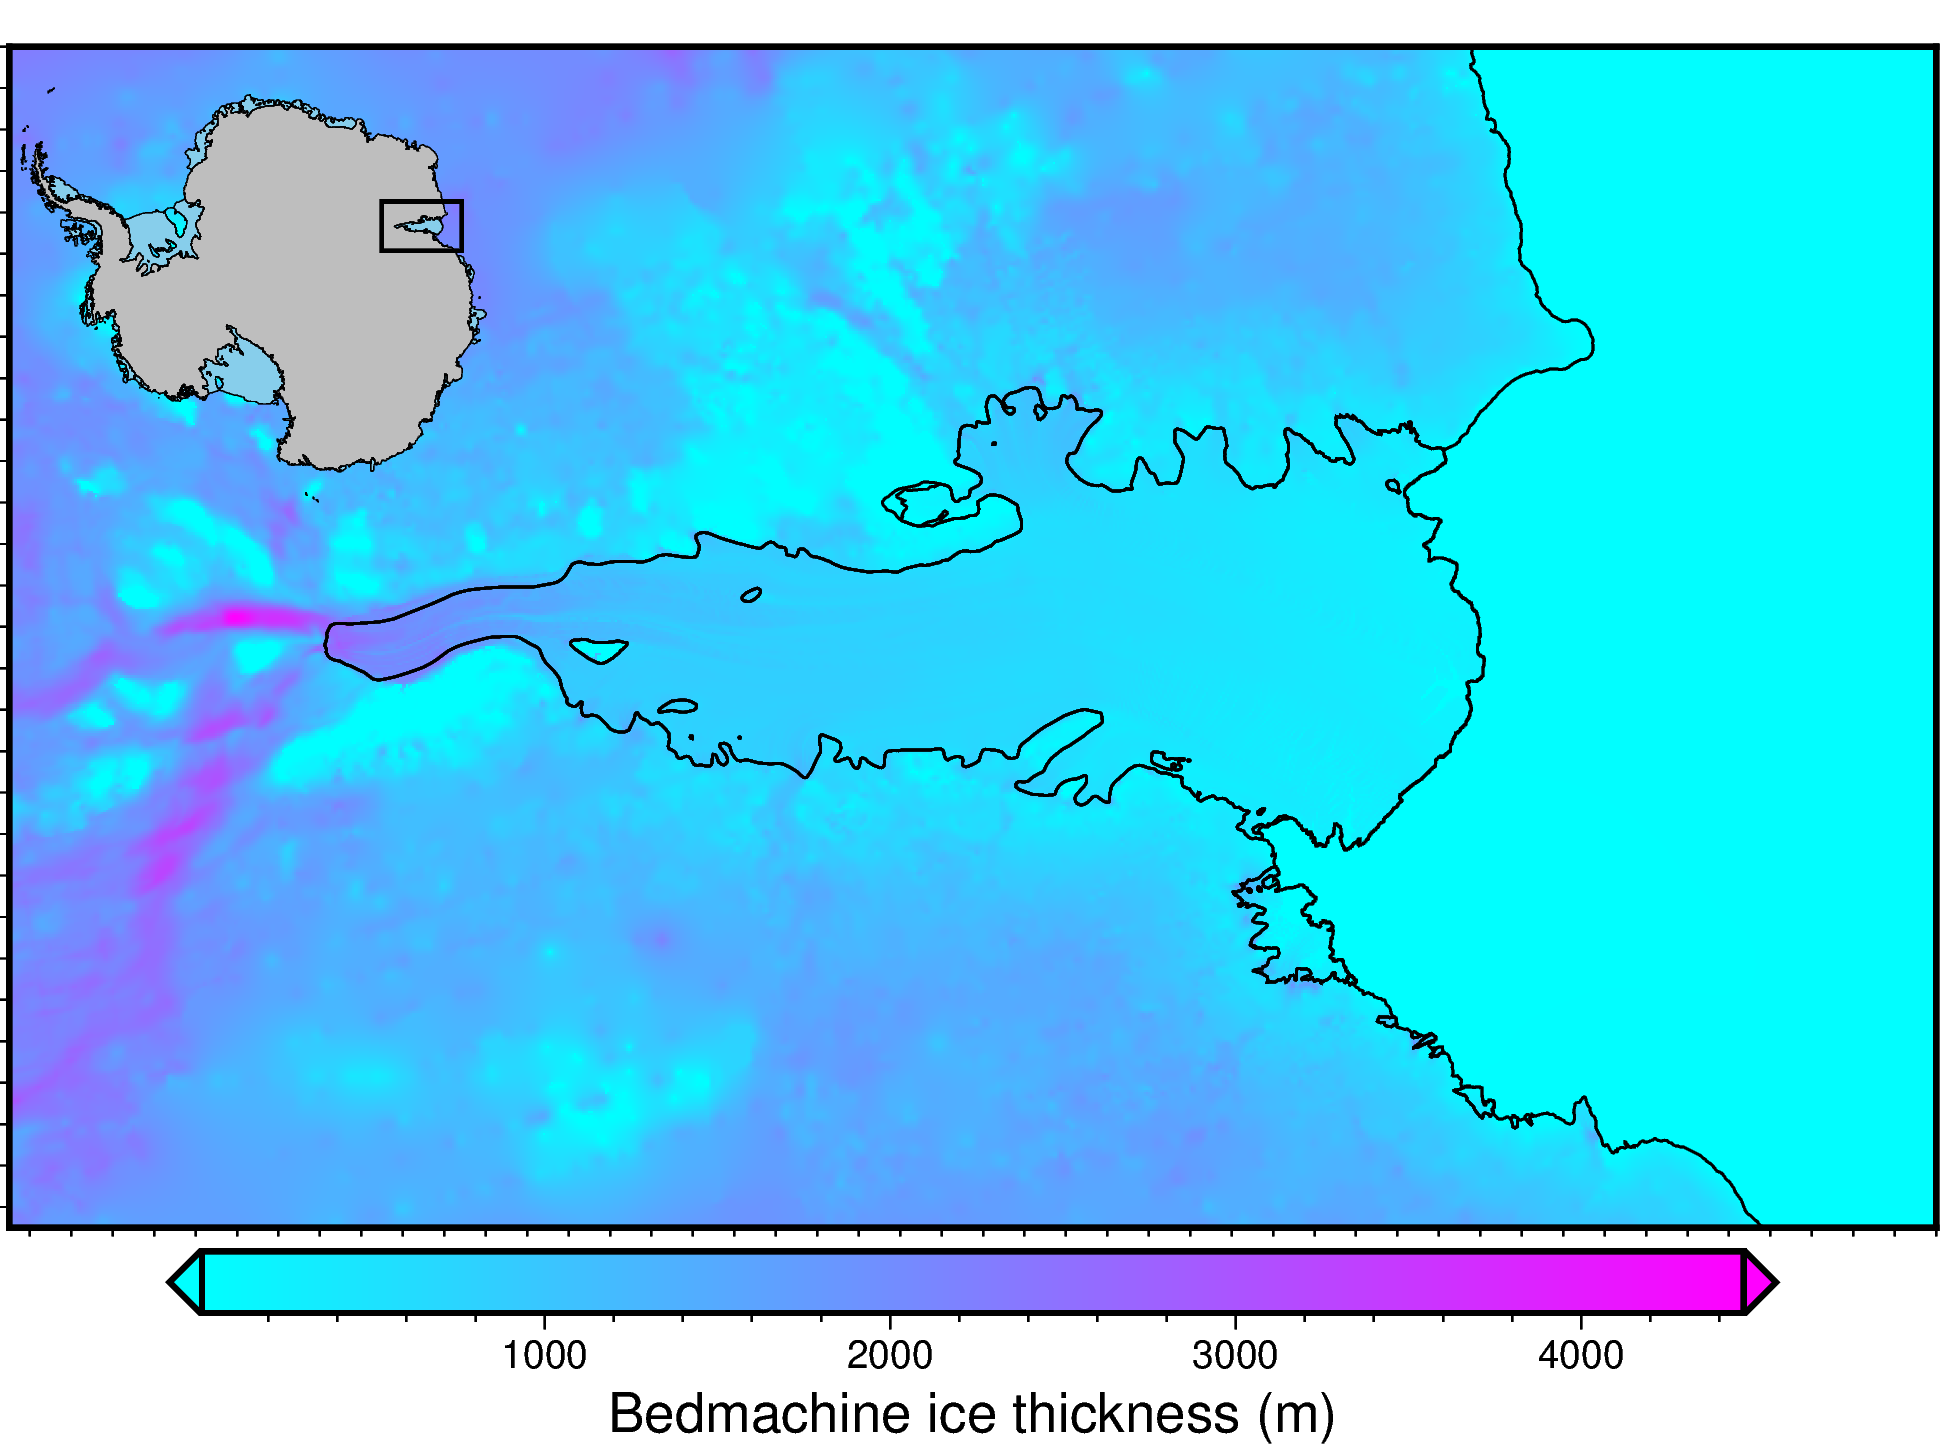

In [1]:
from antarctic_plots import maps, fetch, regions

# load a grid file to plot
ice_thickness = fetch.bedmachine(
    layer="thickness", # choose which layer to plot ['thickness', 'surface', 'bed', 'icebase']
    reference='ellipsoid', # optionally convert from geoid to ellipsoid
    region=regions.amery_ice_shelf, # choose a pre-defined region, or set your own
    spacing=1e3, # optionally change the grid spacing
    )

# plot with automatic figure properties
fig = maps.plot_grd(
    ice_thickness, # set grid to plot
    cmap="cool", # choose GMT colorscale
    coast=True, # plot grounding and coastlines
    cbar_label="Bedmachine ice thickness (m)", # add label
    inset=True, # optionally add inset map showing location
)

# display the figure
fig.show()